In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import seaborn
import scipy.optimize as sco
%matplotlib inline

In [3]:
#Data Reading & Storing

start_time = datetime.datetime(2017,1,1)
end_time = datetime.datetime(2020,12,31)



all_sym_list = ["AMGN","CSCO","AXP","AAPL","WBA","BA", "NKE","CAT","JNJ","CVX","CRM","KO"]
all_sym_list.sort()
all_stocks = web.get_data_yahoo(all_sym_list, start_time ,end_time)#Get the hostorical data from YAHOO

table = all_stocks['Adj Close'] #Create a new dataset with only the Adjusted Closing Price
table

Symbols,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,JNJ,KO,NKE,WBA
Date,,,,,,,,,,,,
2017-01-03,27.277639,134.517654,70.771912,145.533676,84.248009,70.540001,26.905218,99.251274,104.081535,36.634026,49.816982,73.754555
2017-01-04,27.247108,136.427490,71.932106,147.063477,83.871544,72.800003,26.745281,99.226013,103.910828,36.502567,50.861626,73.772362
2017-01-05,27.385668,136.525650,71.045456,147.146927,83.360641,72.790001,26.807476,98.796509,104.998009,36.590214,50.852039,73.816803
2017-01-06,27.690971,139.916946,71.186943,147.508514,83.396454,73.800003,26.860790,98.400665,104.494850,36.581440,51.666664,73.879059
2017-01-09,27.944603,141.755325,71.554817,146.785309,82.795929,73.959999,26.816360,97.558479,104.476868,36.213352,51.158726,73.390068
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-25,116.029999,220.309998,120.580002,217.610001,174.630005,246.820007,42.500000,92.139999,143.679993,52.518211,135.539993,39.070000
2020-11-27,116.589996,224.809998,120.589996,216.500000,175.080002,247.630005,42.700001,91.309998,144.000000,52.290001,134.250000,39.000000
2020-11-30,119.050003,222.039993,118.589996,210.710007,173.589996,245.800003,43.020000,87.180000,144.679993,51.599998,134.699997,38.009998


<Figure size 432x288 with 0 Axes>

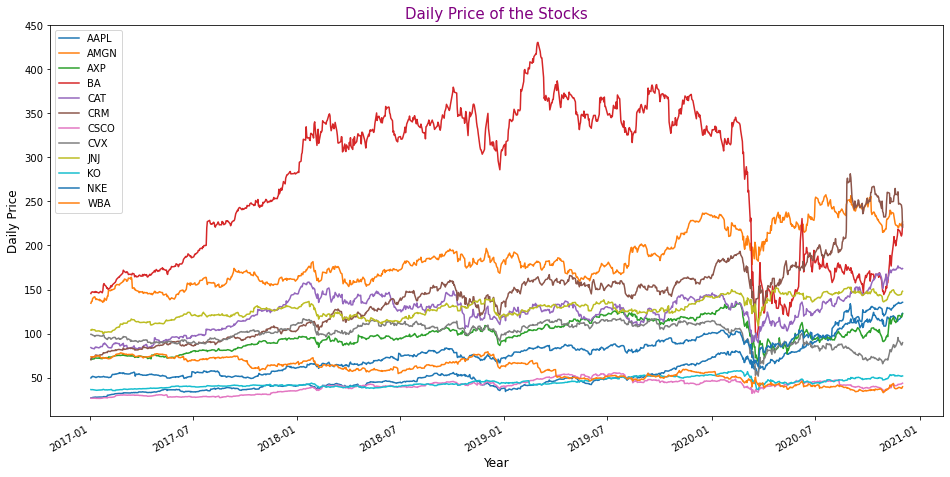

In [4]:
# Calculation and Visualization of the Daily Price
plt.figure(1)
table.plot(figsize = (16,8))
plt.legend()
#plt.legend(loc="upper center", ncol=len(table.columns))
plt.title('Daily Price of the Stocks', fontsize = 15, color = 'Purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Daily Price', fontsize = 12)
plt.gcf().autofmt_xdate()

<Figure size 432x288 with 0 Axes>

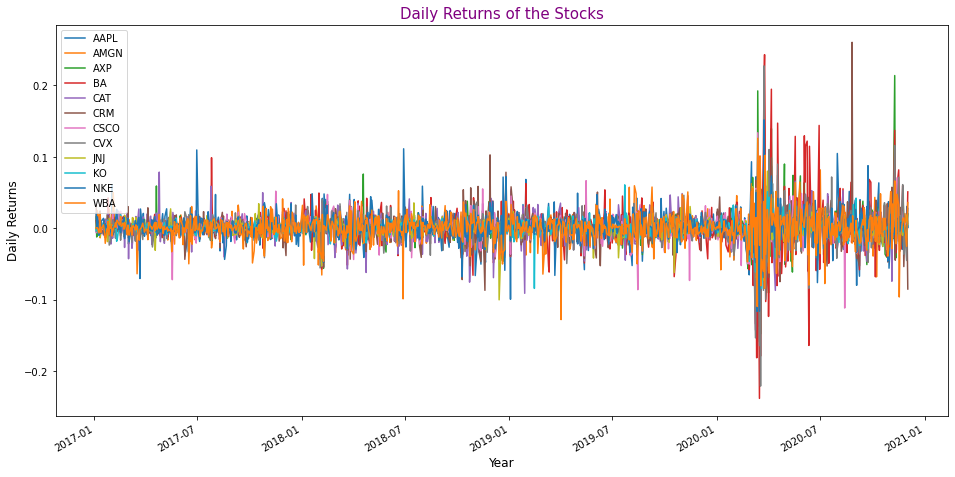

In [5]:
# Calculation and Visualization of the Daily Return
returns = table.pct_change(1)

# Plotting
plt.figure(2)
returns.plot(figsize = (16,8))
plt.legend()
#plt.legend(loc="lower left", ncol=len(table.columns))
plt.title('Daily Returns of the Stocks', fontsize = 15, color = 'Purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Daily Returns', fontsize = 12)
plt.gcf().autofmt_xdate()

----------------------------------------------------
Individual Stock Annualized Returns and Volatility:
----------------------------------------------------
AAPL : Return: 43.58%  Volatility: 31.73%
AMGN : Return: 16.82%  Volatility: 26.49%
AXP : Return: 20.41%  Volatility: 36.20%
BA : Return: 23.44%  Volatility: 49.81%
CAT : Return: 23.89%  Volatility: 32.63%
CRM : Return: 35.26%  Volatility: 35.11%
CSCO : Return: 16.72%  Volatility: 28.95%
CVX : Return: 3.65%  Volatility: 34.96%
JNJ : Return: 11.29%  Volatility: 21.25%
KO : Return: 11.29%  Volatility: 21.28%
NKE : Return: 29.97%  Volatility: 29.62%
WBA : Return: -10.47%  Volatility: 32.31%


<Figure size 432x288 with 0 Axes>

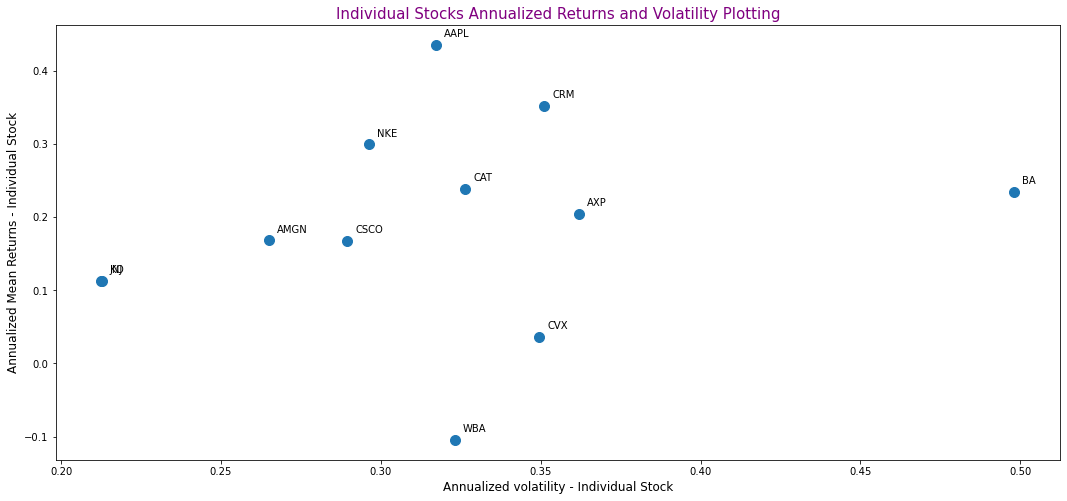

In [6]:
#Computation and Visualization of Mean Return and Volatility of each stock
returns = table.pct_change()

ind_mean_return = returns.mean() *252
ind_vol = np.std(returns)*np.sqrt(252)

#Individual Stocks - Return and their volatility: Plotting:
plt.figure(3)
plt.figure(figsize=(18, 8))
plt.scatter(ind_vol,ind_mean_return,marker='o',s=100)
plt.title('Individual Stocks Annualized Returns and Volatility Plotting', fontsize = 15, color = 'Purple')
plt.xlabel('Annualized volatility - Individual Stock', fontsize = 12)
plt.ylabel('Annualized Mean Returns - Individual Stock', fontsize = 12)

#Individual Stocks: Stock symbols: 
for i, txt in enumerate(table.columns):
    plt.annotate(txt, (ind_vol[i],ind_mean_return[i]), xytext=(8,8), textcoords='offset points')

print ("--"*26)
print ("Individual Stock Annualized Returns and Volatility:")
print ("--"*26)
for i, txt in enumerate(table.columns):
    print (txt,":","Return: {:.2f}%".format(ind_mean_return[i]*100)," Volatility: {:.2f}%".format(ind_vol[i]*100))


<Figure size 432x288 with 0 Axes>

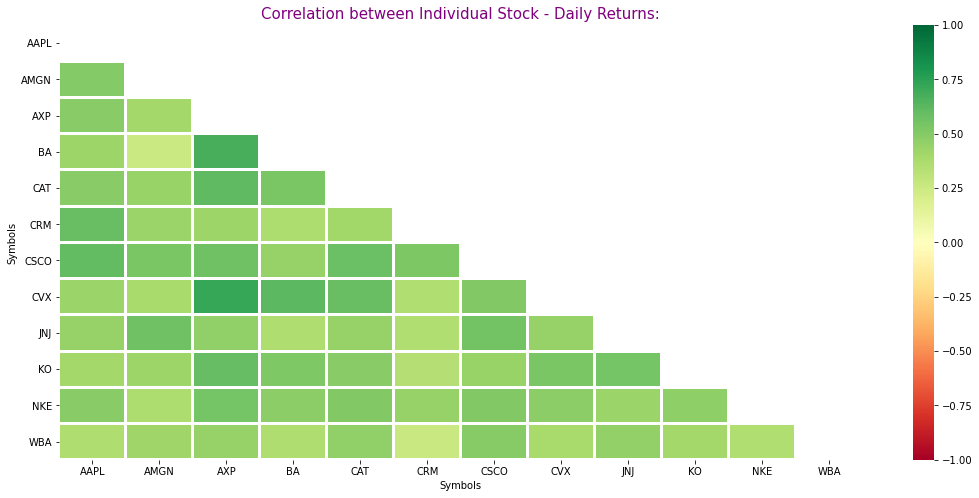

In [7]:
# Correlation plotting:
mask = np.zeros_like(returns.corr())
mask[np.triu_indices_from(mask)] = True

#generate plot
plt.figure(4)
plt.figure(figsize=(18, 8))
seaborn.heatmap(returns.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
plt.title("Correlation between Individual Stock - Daily Returns:", color = 'purple', fontsize = 15)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Annualized Returns')

<Figure size 432x288 with 0 Axes>

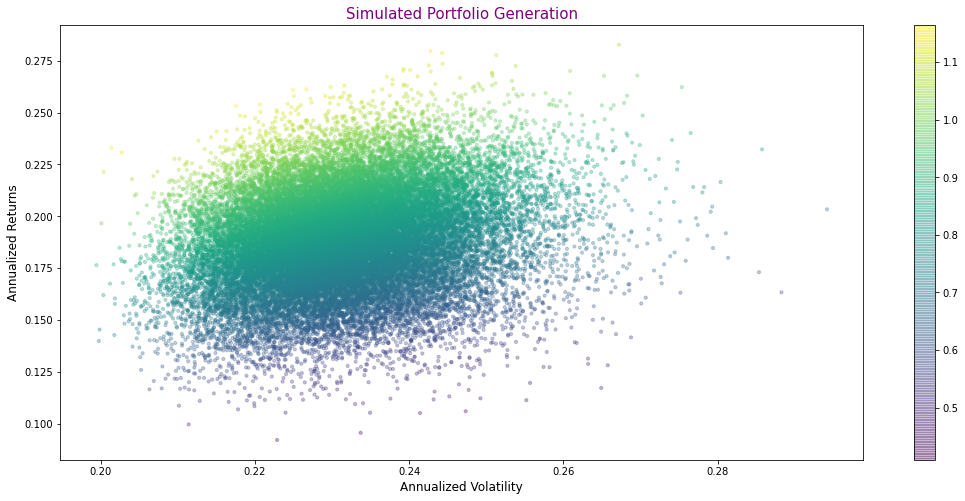

In [8]:
#Initialization
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.0
num_portfolios = 35000 #generation of 25000 random portfolios

# Portfolio Construction:
results = np.zeros((3,num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(table.columns)) 
    weights = weights/np.sum(weights)   
    weights_record.append(weights) #Storing the Weightage and Final output
    portfolio_return = np.sum(mean_returns*weights ) *252 #Portfolio Return 
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)    
    portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev #Sharpe Ratio
    
    #Storing the Final output
    results[0,i], results[1,i], results[2,i] = portfolio_std_dev, portfolio_return, portfolio_sharpe_ratio

plt.figure(5)
plt.figure(figsize=(18, 8))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar()
plt.title('Simulated Portfolio Generation', fontsize = 15, color = 'Purple')
plt.xlabel('Annualized Volatility', fontsize = 12)
plt.ylabel('Annualized Returns', fontsize = 12)

Maximum Sharpe Ratio portfolio:

Portfolio Return: 25.33%
Portfolio Volatility  : 21.75%
Portfolio Sharpe Ratio: 1.16

Stock Allocation with weightage:
Symbols   AAPL  AMGN   AXP   BA   CAT   CRM  CSCO  CVX   JNJ     KO    NKE  \
Weight   16.23  7.49  4.96  3.1  5.68  10.5  6.82  0.3  9.19  13.33  21.88   

Symbols   WBA  
Weight   0.52  
--------------------------------------------------------------------------------

Lowest Volatility portfolio:

Portfolio Return: 17.65%
Portfolio Volatility  : 19.95%
Portfolio Sharpe Ratio: 0.88

Stock Allocation with weightage:
Symbols  AAPL  AMGN   AXP    BA   CAT   CRM  CSCO   CVX    JNJ     KO  NKE  \
Weight   7.21  9.01  3.61  4.13  2.22  9.11  9.49  3.04  22.07  23.94  3.2   

Symbols   WBA  
Weight   2.97  
--------------------------------------------------------------------------------

Maximum Return portfolio:

Portfolio Return: 28.27%
Portfolio Volatility  : 26.72%
Portfolio Sharpe Ratio: 1.06

Stock Allocation with weightage:
Symbols  AA

<Figure size 432x288 with 0 Axes>

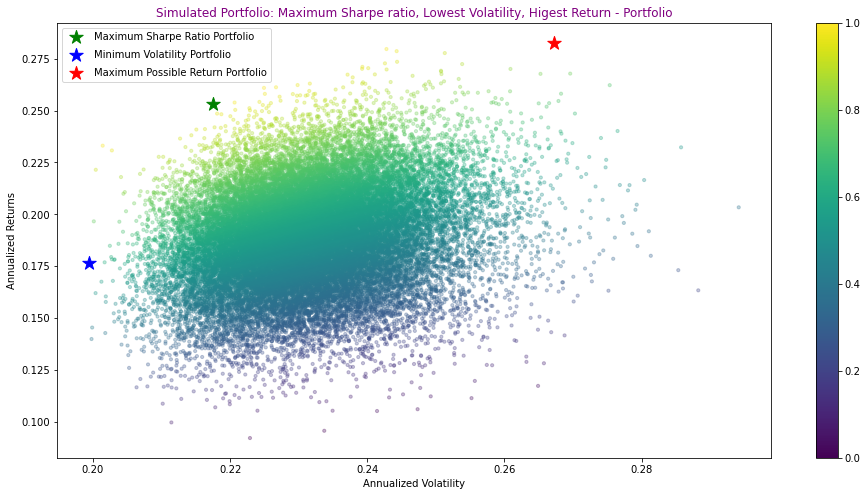

In [9]:
#Highest Sharpe Ratio
portfolio_std_dev_at_highest_sharpe = results[0,np.argmax(results[2])]
portfolio_return_at_highest_sharpe = results[1,np.argmax(results[2])]
portfolio_sharpe_ratio_at_highest_sharpe = results[2,np.argmax(results[2])]

allocation_at_highest_sharpe = pd.DataFrame(weights_record[np.argmax(results[2])],index=table.columns,columns=['Weight'])
allocation_at_highest_sharpe.Weight = [round(i*100,2)for i in allocation_at_highest_sharpe.Weight]
allocation_at_highest_sharpe = allocation_at_highest_sharpe.T

#Lowest Volatility
portfolio_std_dev_at_lowest_volatility = results[0,np.argmin(results[0])]
portfolio_return_at_lowest_volatility = results[1,np.argmin(results[0])]
portfolio_sharpe_ratio_at_lowest_volatility = results[2,np.argmin(results[0])]

allocation_at_lowest_volatility = pd.DataFrame(weights_record[np.argmin(results[0])],index=table.columns,columns=['Weight'])
allocation_at_lowest_volatility.Weight = [round(i*100,2)for i in allocation_at_lowest_volatility.Weight]
allocation_at_lowest_volatility = allocation_at_lowest_volatility.T

#Highest Return 
portfolio_std_dev_at_highest_return = results[0,np.argmax(results[1])]
portfolio_return_at_highest_return = results[1,np.argmax(results[1])]
portfolio_sharpe_ratio_at_highest_return = results[2,np.argmax(results[1])]

allocation_at_highest_return = pd.DataFrame(weights_record[np.argmax(results[1])],index=table.columns,columns=['Weight'])
allocation_at_highest_return.Weight = [round(i*100,2)for i in allocation_at_highest_return.Weight]
allocation_at_highest_return = allocation_at_highest_return.T


print("Maximum Sharpe Ratio portfolio:\n")
print("Portfolio Return: {:.2f}%".format(portfolio_return_at_highest_sharpe*100))
print("Portfolio Volatility  : {:.2f}%".format(portfolio_std_dev_at_highest_sharpe*100))
print("Portfolio Sharpe Ratio: {:.2f}".format(portfolio_sharpe_ratio_at_highest_sharpe))
print("\nStock Allocation with weightage:")
print(allocation_at_highest_sharpe)
print("--"*40)

print("\nLowest Volatility portfolio:\n")
print("Portfolio Return: {:.2f}%".format(portfolio_return_at_lowest_volatility*100))
print("Portfolio Volatility  : {:.2f}%".format(portfolio_std_dev_at_lowest_volatility*100))
print("Portfolio Sharpe Ratio: {:.2f}".format(portfolio_sharpe_ratio_at_lowest_volatility))
print("\nStock Allocation with weightage:")
print(allocation_at_lowest_volatility)
print("--"*40)

print("\nMaximum Return portfolio:\n")
print("Portfolio Return: {:.2f}%".format(portfolio_return_at_highest_return*100))
print("Portfolio Volatility  : {:.2f}%".format(portfolio_std_dev_at_highest_return*100))
print("Portfolio Sharpe Ratio: {:.2f}".format(portfolio_sharpe_ratio_at_highest_return))
print("\nStock Allocation with weightage:")
print(allocation_at_highest_return)
print("--"*40)

plt.figure(6)
plt.figure(figsize=(16, 8))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
plt.scatter(portfolio_std_dev_at_highest_sharpe,portfolio_return_at_highest_sharpe, marker='*',s=200, color = 'green',label='Maximum Sharpe Ratio Portfolio')
plt.scatter(portfolio_std_dev_at_lowest_volatility,portfolio_return_at_lowest_volatility,marker='*',s=200,color ='blue',label='Minimum Volatility Portfolio')
plt.scatter(portfolio_std_dev_at_highest_return,portfolio_return_at_highest_return,marker='*',s=200,color ='red',label='Maximum Possible Return Portfolio')

plt.colorbar()
plt.title('Simulated Portfolio: Maximum Sharpe ratio, Lowest Volatility, Higest Return - Portfolio', color = 'purple')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.legend(labelspacing=0.8)

In [10]:
def port_vol_ret(weights, mean_returns, cov_matrix):
    return np.sqrt(252*np.dot(weights.T, np.dot(cov_matrix, weights))), np.sum(mean_returns*weights)*252

def port_vol(weights, mean_returns, cov_matrix):
    return port_vol_ret(weights, mean_returns, cov_matrix)[0]

def port_ret(weights):
    return port_vol_ret(weights, mean_returns, cov_matrix)[1]

def efficient_return(mean_returns, cov_matrix, target):
    args = (mean_returns, cov_matrix)  
    init_guess = len(table.columns)*[1./len(table.columns),]
    bounds = tuple((0,1) for asset in range(len(table.columns)))
    cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - target},{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})   
    result = sco.minimize(port_vol, init_guess, args, method='SLSQP', bounds=bounds, constraints = cons)
    return result

def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

<Figure size 432x288 with 0 Axes>

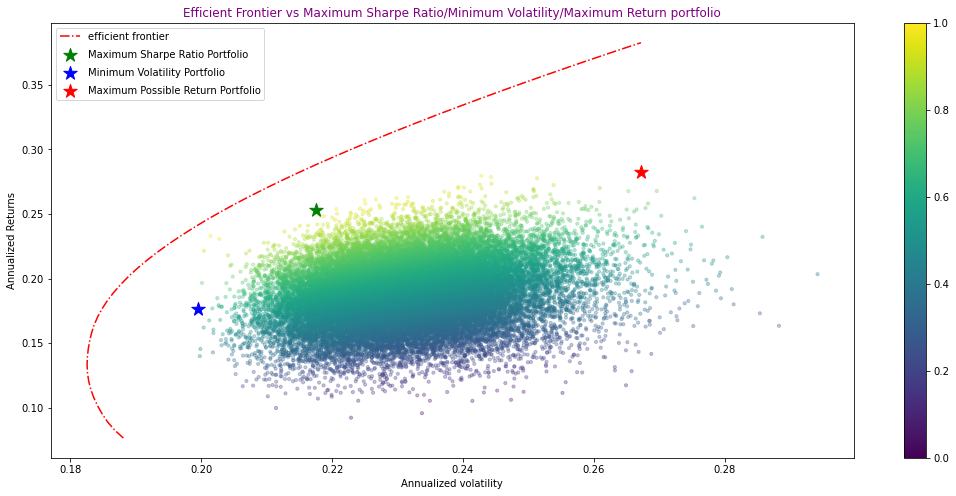

In [11]:
target = np.linspace(results[1,np.argmin(results[0])]-0.1, results[1,np.argmax(results[1])]+0.1, 50)
efficient_portfolios = [p['fun'] for p in efficient_frontier(mean_returns, cov_matrix, target)]

plt.figure(7)
plt.figure(figsize=(18, 8))  
plt.plot(efficient_portfolios, target, linestyle='-.', color='red', label='efficient frontier')
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
plt.scatter(portfolio_std_dev_at_highest_sharpe,portfolio_return_at_highest_sharpe, marker='*',s=200, color = 'green',label='Maximum Sharpe Ratio Portfolio')
plt.scatter(portfolio_std_dev_at_lowest_volatility,portfolio_return_at_lowest_volatility,marker='*',s=200,color ='blue',label='Minimum Volatility Portfolio')
plt.scatter(portfolio_std_dev_at_highest_return,portfolio_return_at_highest_return,marker='*',s=200,color ='red',label='Maximum Possible Return Portfolio') 
plt.colorbar()
plt.title('Efficient Frontier vs Maximum Sharpe Ratio/Minimum Volatility/Maximum Return portfolio', color = 'purple')
plt.xlabel('Annualized volatility')
plt.ylabel('Annualized Returns')
plt.legend(labelspacing=0.8)
plt.show()

NameError: name 'ind_volatility' is not defined

<Figure size 432x288 with 0 Axes>

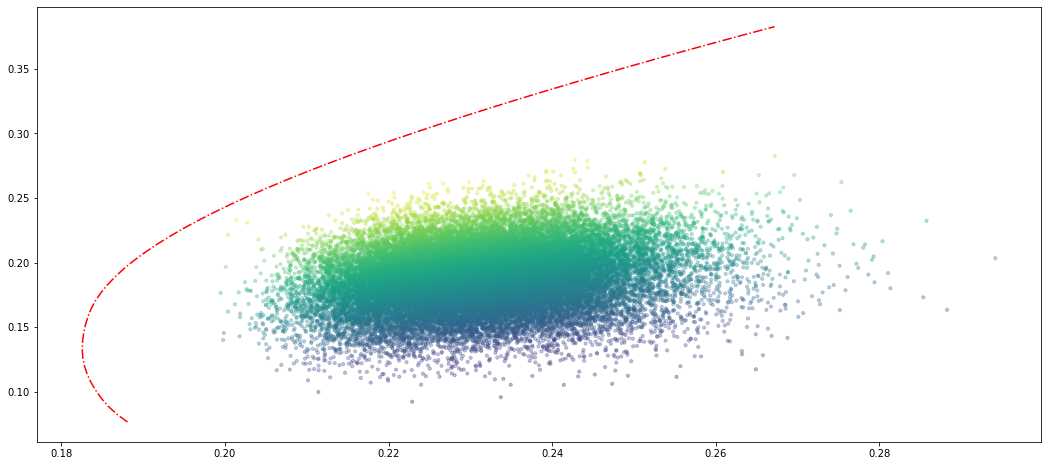

In [12]:
plt.figure(8)
plt.figure(figsize=(18, 8))  
plt.plot(efficient_portfolios, target, linestyle='-.', color='red', label='efficient frontier')
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
plt.scatter(ind_volatility,ind_mean_return,marker='o',s=100)
for i, txt in enumerate(table.columns):
    plt.annotate(txt, (ind_volatility[i],ind_mean_return[i]), xytext=(10,0), textcoords='offset points')   
plt.scatter(ind_volatility,ind_mean_return,marker='o',s=100)    
plt.scatter(portfolio_std_dev_at_highest_sharpe,portfolio_return_at_highest_sharpe, marker='*',s=200, color = 'green',label='Maximum Sharpe Ratio Portfolio')
plt.scatter(portfolio_std_dev_at_lowest_volatility,portfolio_return_at_lowest_volatility,marker='*',s=200,color ='blue',label='Minimum Volatility Portfolio')
plt.scatter(portfolio_std_dev_at_highest_return,portfolio_return_at_highest_return,marker='*',s=200,color ='red',label='Maximum Possible Return Portfolio') 
plt.colorbar()
plt.title('Efficient Frontier vs Maximum Sharpe Ratio/Minimum Volatility/Maximum Return portfolio with Individul Stocks: Return & Risk', color = 'purple')
plt.xlabel('Annualized volatility')
plt.ylabel('Annualized Returns')
plt.legend(labelspacing=0.8)
plt.show()

Portfolio would have grown from 4557.17 to 22313.12 between the given timeframe had it been invested as per stocks proposition available at the Max Sharpe Ratio
Portfolio would have grown from 5767.64 to 18375.77 between the given timeframe had it been invested as per stocks proposition available at the Minimum Volatility


<ipython-input-644-236e22366849>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Maximum_Sharpe'] = np.dot(table, weights_record[np.argmax(results[2])])
<ipython-input-644-236e22366849>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Minimum_Volatility'] = np.dot(table, weights_record[np.argmin(results[0])])


<Figure size 432x288 with 0 Axes>

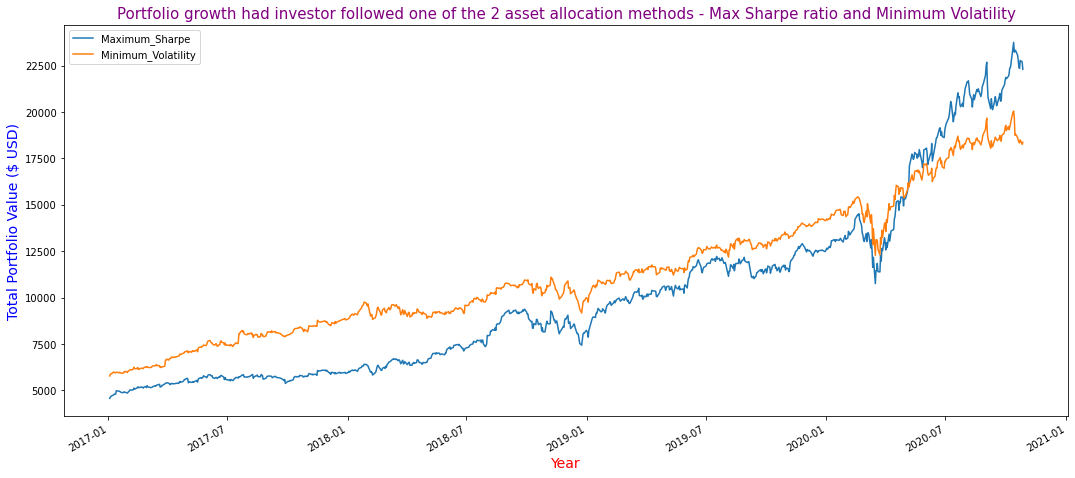

In [644]:
table = all_stocks['Adj Close'] 
table['Maximum_Sharpe'] = np.dot(table, weights_record[np.argmax(results[2])])
new_table = pd.DataFrame(table['Maximum_Sharpe'])

table = all_stocks['Adj Close'] 
table['Minimum_Volatility'] = np.dot(table, weights_record[np.argmin(results[0])])
new_table['Minimum_Volatility'] = table['Minimum_Volatility']

table = all_stocks['Adj Close']

#table = all_stocks['Adj Close'] 
#table['Maximum_Return'] = np.dot(table, weights_record[np.argmax(results[1])])
#new_table['Maximum_Return'] = table['Maximum_Return']

plt.figure(9)
new_table.plot(figsize = (18,8))
plt.title("Portfolio growth had investor followed one of the 2 asset allocation methods - Max Sharpe ratio and Minimum Volatility", fontsize = 15, color = 'Purple')
plt.xlabel('Year', fontsize = 14, color = 'red')
plt.ylabel('Total Portfolio Value ($ USD)', fontsize = 14, color = 'blue')

print("Portfolio would have grown from {:.2f}".format(new_table.iloc[0,0]) 
          + " to {:.2f}".format(new_table.iloc[new_table.shape[0]-1,0]) 
          + " between the given timeframe had it been invested as per stocks proposition available at the Max Sharpe Ratio")

print("Portfolio would have grown from {:.2f}".format(new_table.iloc[0,1]) 
          + " to {:.2f}".format(new_table.iloc[new_table.shape[0]-1,1]) 
          + " between the given timeframe had it been invested as per stocks proposition available at the Minimum Volatility")
